In [6]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.append('../../src')
from DataHandler import DataHandler

In [8]:
dataHandler = DataHandler("../config.yaml")

## Einlesen der Datens√§tze

In [9]:
# Lade alle √Ñhnlichkeitsmatrizen aus der Konfigurationsdatei
print("Lade √Ñhnlichkeitsmatrizen...")

df_ai_similarity = dataHandler.load_data("files.df_ai_similarity")
df_keyword_cos_similarity = dataHandler.load_data("files.df_keyword_cos_similarity")
df_keyword_jaccard_similarity = dataHandler.load_data("files.df_keyword_jaccard_similarity")
df_keyword_weighted_jaccard_similarity = dataHandler.load_data("files.df_keyword_weighted_jaccard_similarity")
df_keyword_tfidf_cosine_similarity = dataHandler.load_data("files.df_keyword_tfidf_cosine_similarity")
df_keyword_overlap_similarity = dataHandler.load_data("files.df_keyword_overlap_similarity")
df_keyword_dice_similarity = dataHandler.load_data("files.df_keyword_dice_similarity")
df_keyword_hierarchical_similarity = dataHandler.load_data("files.df_keyword_hierarchical_similarity")
df_minhash_text_similarity = dataHandler.load_data("files.df_minhash_text_similarity")

Lade √Ñhnlichkeitsmatrizen...
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/OPAL_ai_similaritiy.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/cosine_keywords_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/jaccard_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/weighted_jaccard_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/tfidf_cosine_keyword_similarity_optimized.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/overlap_coefficient_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/dice_coefficient_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/ddc_keyword_hierarchical_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_transfer/processed/minhash_text_similarity_matrix.p


In [10]:
# Automatische Bereinigung aller √Ñhnlichkeitsmatrizen
print("Bereinige alle √Ñhnlichkeitsmatrizen...")

# Liste aller geladenen √Ñhnlichkeitsmatrizen
similarity_matrices = {
    'AI': df_ai_similarity,
    'MinHash Text': df_minhash_text_similarity,
    'Cosine': df_keyword_cos_similarity,
    'Jaccard': df_keyword_jaccard_similarity,
    'Weighted Jaccard': df_keyword_weighted_jaccard_similarity,
    'TF-IDF Cosine': df_keyword_tfidf_cosine_similarity,
    'Overlap': df_keyword_overlap_similarity,
    'Dice': df_keyword_dice_similarity,
    'Hierarchical': df_keyword_hierarchical_similarity,
}

# Bearbeite alle Matrizen automatisch
for name, matrix in similarity_matrices.items():
    print(f"  Bearbeite {name} Matrix...")
    
    # Entferne Index-Level-Namen (falls vorhanden)
    if hasattr(matrix.index, 'nlevels') and matrix.index.nlevels > 1:
        matrix.index.names = [None] * matrix.index.nlevels
    if hasattr(matrix.columns, 'nlevels') and matrix.columns.nlevels > 1:
        matrix.columns.names = [None] * matrix.columns.nlevels
    
    # Setze Diagonale auf NaN
    np.fill_diagonal(matrix.values, np.nan)
    
    print(f"    ‚úì Shape: {matrix.shape}")

print("‚úÖ Alle √Ñhnlichkeitsmatrizen bereinigt!")
print(f"Verf√ºgbare Matrizen: {list(similarity_matrices.keys())}")

Bereinige alle √Ñhnlichkeitsmatrizen...
  Bearbeite AI Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite MinHash Text Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Cosine Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Jaccard Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Weighted Jaccard Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite TF-IDF Cosine Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Overlap Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Dice Matrix...
    ‚úì Shape: (4548, 4548)
  Bearbeite Hierarchical Matrix...
    ‚úì Shape: (4548, 4548)
‚úÖ Alle √Ñhnlichkeitsmatrizen bereinigt!
Verf√ºgbare Matrizen: ['AI', 'MinHash Text', 'Cosine', 'Jaccard', 'Weighted Jaccard', 'TF-IDF Cosine', 'Overlap', 'Dice', 'Hierarchical']


In [11]:
# Automatische Erstellung der oberen Dreiecksmatrizen f√ºr alle √Ñhnlichkeitsmatrizen
print("Erstelle obere Dreiecksmatrizen...")

def upper_triangle_matrix(df):
    """Erzeugt obere Dreiecksmatrix mit NaN f√ºr untere Dreiecks- und Diagonalelemente"""
    mask = np.triu(np.ones(df.shape), k=1).astype(bool)
    upper_triangle_df = df.where(mask)
    return upper_triangle_df

# Erstelle automatisch obere Dreiecksmatrizen f√ºr alle √Ñhnlichkeitsmatrizen
upper_triangle_matrices = {}
for name, matrix in similarity_matrices.items():
    var_name = name.lower().replace(' ', '_').replace('-', '_')
    upper_matrix = upper_triangle_matrix(matrix)
    upper_triangle_matrices[var_name] = upper_matrix
    
    # Erstelle Variablen mit standardisierten Namen
    globals()[f'df_{var_name}_similarity_upper'] = upper_matrix
    
    print(f"  ‚úì {name} ‚Üí df_{var_name}_similarity_upper")

print("‚úÖ Alle oberen Dreiecksmatrizen erstellt!")
print(f"Verf√ºgbare obere Dreiecksmatrizen:")
for key in upper_triangle_matrices.keys():
    print(f"  - df_{key}_similarity_upper")

# Zeige Beispiel der ersten Matrix
first_key = list(upper_triangle_matrices.keys())[0]
first_matrix = upper_triangle_matrices[first_key]
print(f"\nBeispiel (erste Matrix - {first_key}):")
print(f"Shape: {first_matrix.shape}")
print(f"Non-NaN Werte: {first_matrix.count().sum()}")

Erstelle obere Dreiecksmatrizen...
  ‚úì AI ‚Üí df_ai_similarity_upper
  ‚úì MinHash Text ‚Üí df_minhash_text_similarity_upper
  ‚úì Cosine ‚Üí df_cosine_similarity_upper
  ‚úì Jaccard ‚Üí df_jaccard_similarity_upper
  ‚úì Weighted Jaccard ‚Üí df_weighted_jaccard_similarity_upper
  ‚úì TF-IDF Cosine ‚Üí df_tf_idf_cosine_similarity_upper
  ‚úì Overlap ‚Üí df_overlap_similarity_upper
  ‚úì Dice ‚Üí df_dice_similarity_upper
  ‚úì Hierarchical ‚Üí df_hierarchical_similarity_upper
‚úÖ Alle oberen Dreiecksmatrizen erstellt!
Verf√ºgbare obere Dreiecksmatrizen:
  - df_ai_similarity_upper
  - df_minhash_text_similarity_upper
  - df_cosine_similarity_upper
  - df_jaccard_similarity_upper
  - df_weighted_jaccard_similarity_upper
  - df_tf_idf_cosine_similarity_upper
  - df_overlap_similarity_upper
  - df_dice_similarity_upper
  - df_hierarchical_similarity_upper

Beispiel (erste Matrix - ai):
Shape: (4548, 4548)
Non-NaN Werte: 10339878


In [12]:
# Welche column Namen sind in allen 7 Dataframes enthalten?

all_ids = set ()
for matrix in similarity_matrices.values():
    all_ids.update(matrix.columns.tolist())

len(all_ids)

4548

In [13]:
# welche IDs aus welchem DataFrame sind denn in den anderen nicht enthalten?

for name, matrix in similarity_matrices.items():
    missing_ids = set(matrix.columns) - all_ids
    if missing_ids:
        print(f"Fehlende IDs in {name}: {missing_ids}")
    else:
        print(f"Alle IDs in {name} sind in den anderen Matrizen enthalten.")

Alle IDs in AI sind in den anderen Matrizen enthalten.
Alle IDs in MinHash Text sind in den anderen Matrizen enthalten.
Alle IDs in Cosine sind in den anderen Matrizen enthalten.
Alle IDs in Jaccard sind in den anderen Matrizen enthalten.
Alle IDs in Weighted Jaccard sind in den anderen Matrizen enthalten.
Alle IDs in TF-IDF Cosine sind in den anderen Matrizen enthalten.
Alle IDs in Overlap sind in den anderen Matrizen enthalten.
Alle IDs in Dice sind in den anderen Matrizen enthalten.
Alle IDs in Hierarchical sind in den anderen Matrizen enthalten.


Erstelle Histogramme f√ºr alle √Ñhnlichkeitsmatrizen...


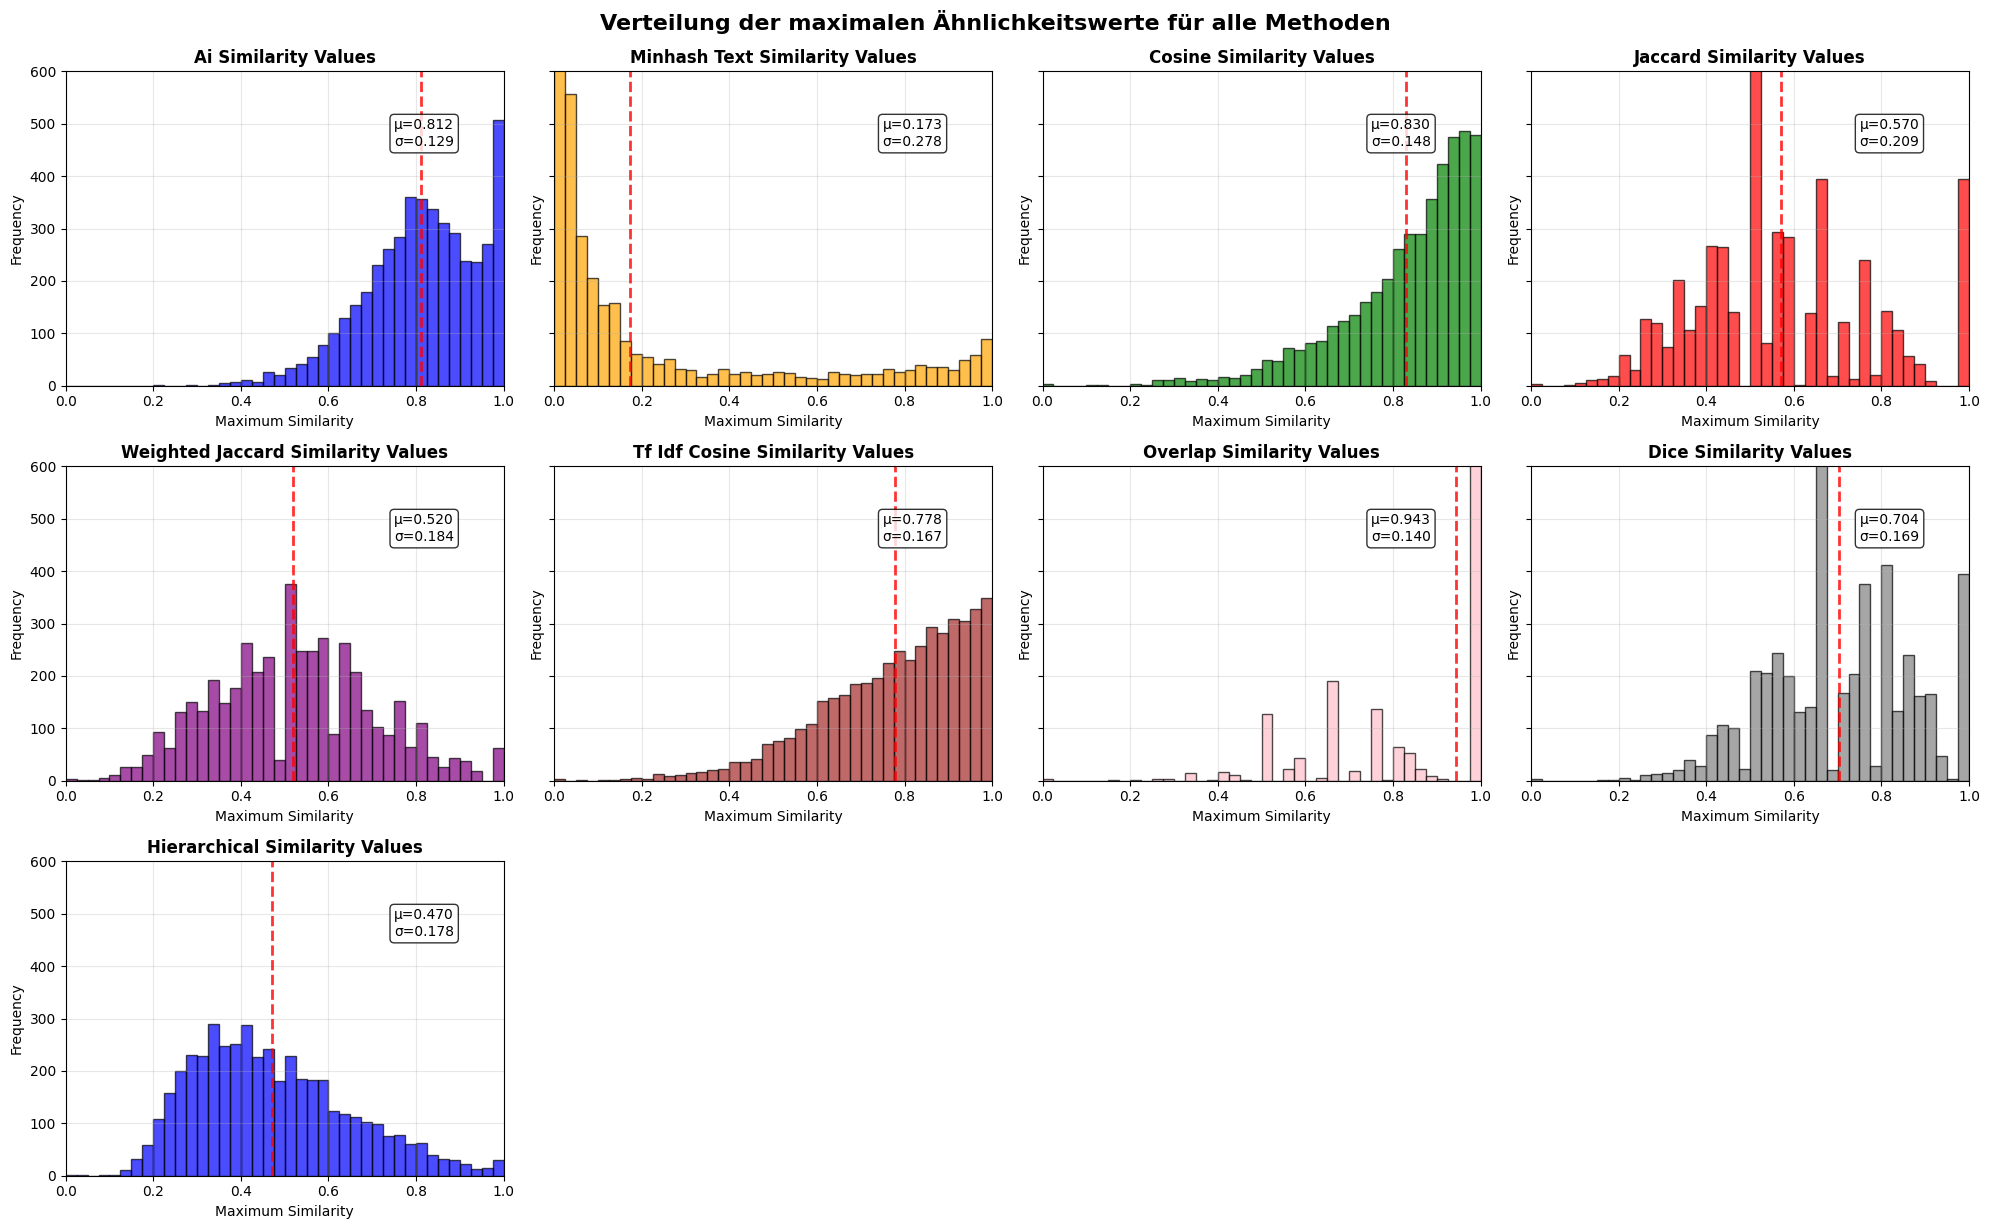

‚úÖ Histogramme f√ºr 9 √Ñhnlichkeitsmatrizen erstellt und gespeichert!
Datei: all_similarity_histograms_comparison.png


In [14]:
# Automatische Histogramm-Visualisierung f√ºr alle √Ñhnlichkeitsmatrizen
print("Erstelle Histogramme f√ºr alle √Ñhnlichkeitsmatrizen...")

# Anzahl der Matrizen bestimmen
n_matrices = len(upper_triangle_matrices)

# Berechne optimale Subplot-Anordnung
import math
n_cols = min(4, n_matrices)  # Maximal 4 Spalten
n_rows = math.ceil(n_matrices / n_cols)

# Erstelle Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=True)

# Stelle sicher, dass axes ein Array ist, auch bei nur einem Subplot
if n_matrices == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Farben f√ºr verschiedene √Ñhnlichkeitsmatrizen
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Erstelle Histogramm f√ºr jede Matrix
for i, (name, matrix) in enumerate(upper_triangle_matrices.items()):
    if i < len(axes):
        # Berechne Maximum pro Zeile (Material)
        max_similarities = matrix.max(axis=1)
        
        # Erstelle Histogramm
        max_similarities.hist(
            bins=np.arange(0, 1.01, 0.025), 
            edgecolor='black', 
            ax=axes[i], 
            color=colors[i % len(colors)], 
            alpha=0.7
        )
        
        # Formatiere Titel und Achsen
        axes[i].set_title(f'{name.replace("_", " ").title()} Similarity Values', fontweight='bold')
        axes[i].set_xlabel('Maximum Similarity')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 600)
        axes[i].grid(True, alpha=0.3)
        
        # F√ºge Statistiken hinzu
        mean_val = max_similarities.mean()
        std_val = max_similarities.std()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2)
        
        # Textbox mit Statistiken
        stats_text = f'Œº={mean_val:.3f}\nœÉ={std_val:.3f}'
        axes[i].text(0.75, 0.85, stats_text, transform=axes[i].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    verticalalignment='top')

# Verstecke √ºbersch√ºssige Subplots
for i in range(n_matrices, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Verteilung der maximalen √Ñhnlichkeitswerte f√ºr alle Methoden', 
             fontsize=16, y=1.02, fontweight='bold')

# Speichere das Diagramm
plt.savefig('all_similarity_histograms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úÖ Histogramme f√ºr {n_matrices} √Ñhnlichkeitsmatrizen erstellt und gespeichert!")
print("Datei: all_similarity_histograms_comparison.png")

In [15]:
# Automatische Erstellung eines kombinierten DataFrames f√ºr alle √Ñhnlichkeitsmatrizen
# Mit Datei-Logging f√ºr Debugging

# Setup f√ºr Logging in Datei
import datetime
import os
import psutil  # F√ºr Memory-Monitoring

# Memory-Status zu Beginn
process = psutil.Process()
initial_memory_mb = process.memory_info().rss / (1024 * 1024)
available_memory_gb = psutil.virtual_memory().available / (1024**3)

# Erstelle Log-Datei
log_file = Path("../../processed/build_pairlist_debug.log")
log_file.parent.mkdir(parents=True, exist_ok=True)

def log_print(*args, **kwargs):
    """Druckt sowohl in Konsole als auch in Datei"""
    message = " ".join(str(arg) for arg in args)
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_message = f"[{timestamp}] {message}"
    
    # In Konsole ausgeben
    print(message, **kwargs)
    
    # In Datei schreiben
    try:
        with open(log_file, "a", encoding="utf-8") as f:
            f.write(log_message + "\n")
            f.flush()  # Sofort schreiben
    except Exception as e:
        print(f"Logging-Fehler: {e}")

# Starte neues Log
with open(log_file, "w", encoding="utf-8") as f:
    f.write(f"=== BUILD PAIRLIST DEBUG LOG ===\n")
    f.write(f"Started at: {datetime.datetime.now()}\n")
    f.write(f"Log file: {log_file}\n\n")

log_print("Erstelle kombinierten DataFrame f√ºr alle √Ñhnlichkeitsmatrizen...")
log_print("(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)")
log_print(f"Debug-Log wird geschrieben nach: {log_file}")

# Memory-Status
log_print(f"üíæ MEMORY-STATUS ZU BEGINN:")
log_print(f"   üñ•Ô∏è  Prozess-Memory: {initial_memory_mb:.1f} MB")
log_print(f"   üñ•Ô∏è  Verf√ºgbarer RAM: {available_memory_gb:.1f} GB")
log_print(f"   ‚ö†Ô∏è  Kritisch wenn <2GB verf√ºgbar!")

def monitor_memory():
    """√úberwacht aktuellen Memory-Verbrauch"""
    current_memory_mb = process.memory_info().rss / (1024 * 1024)
    available_gb = psutil.virtual_memory().available / (1024**3)
    return current_memory_mb, available_gb

def sorted_pair(file1, file2):
    """Erstellt ein sortiertes Tupel f√ºr konsistente Paar-Identifikation"""
    return tuple(sorted([file1, file2]))

# Sammle alle √Ñhnlichkeitswerte pro Dateipaar
all_similarities = {}

log_print(f"Verf√ºgbare Matrizen: {list(upper_triangle_matrices.keys())}")
log_print(f"Anzahl zu verarbeitender Matrizen: {len(upper_triangle_matrices)}")

# VORAB MEMORY-SCH√ÑTZUNG
total_estimated_pairs = 0
for name, matrix in upper_triangle_matrices.items():
    # Sch√§tze Anzahl Nicht-NaN Paare pro Matrix
    estimated_pairs = matrix.count().sum()
    total_estimated_pairs += estimated_pairs
    log_print(f"  üìä {name}: ~{estimated_pairs:,} gesch√§tzte Paare")

# Gesch√§tzte finale Dictionary-Gr√∂√üe und Memory-Bedarf
estimated_unique_pairs = total_estimated_pairs // len(upper_triangle_matrices)  # Approximation
estimated_total_memory_gb = (estimated_unique_pairs * 200 * len(upper_triangle_matrices)) / (1024**3)  # ~200 bytes pro Eintrag
log_print(f"üìä VORAB-SCH√ÑTZUNG:")
log_print(f"   üìà Gesch√§tzte eindeutige Paare: ~{estimated_unique_pairs:,}")
log_print(f"   üíæ Gesch√§tzter Memory-Bedarf: ~{estimated_total_memory_gb:.1f} GB")
log_print(f"   üñ•Ô∏è  Verf√ºgbarer RAM: {available_memory_gb:.1f} GB")

if estimated_total_memory_gb > available_memory_gb * 0.8:
    log_print(f"   ‚ö†Ô∏è  WARNUNG: Gesch√§tzter Memory-Bedarf k√∂nnte verf√ºgbaren RAM √ºbersteigen!")
    log_print(f"   üí° Chunk-Verarbeitung wird automatisch aktiviert bei >50k Paaren")

log_print(f"\nüîÑ STARTE MATRIX-VERARBEITUNG (mit automatischem Memory-Cleanup):")
log_print("=" * 60)

# Create a copy of the items to avoid "dictionary changed size during iteration" error
matrices_to_process = list(upper_triangle_matrices.items())

for name, matrix in matrices_to_process:
    log_print(f"  Verarbeite {name}...")
    log_print(f"    Matrix Shape: {matrix.shape}")
    log_print(f"    Matrix Index Type: {type(matrix.index)}")
    log_print(f"    Matrix Columns Type: {type(matrix.columns)}")
    
    try:
        # Entferne Index- und Spalten-Namen vor dem Stack-Vorgang
        matrix_clean = matrix.copy()
        matrix_clean.index.name = None
        matrix_clean.columns.name = None
        
        log_print(f"    Matrix nach Bereinigung - Index Name: {matrix_clean.index.name}")
        log_print(f"    Matrix nach Bereinigung - Columns Name: {matrix_clean.columns.name}")
        
        # Einfache Konvertierung zu stacked DataFrame mit future_stack=True
        log_print(f"    Starte Stack-Operation...")
        matrix_stacked = matrix_clean.stack(future_stack=True)
        log_print(f"    Stack erfolgreich - Shape: {matrix_stacked.shape}")
        
        matrix_stacked_df = matrix_stacked.reset_index()
        log_print(f"    Reset Index erfolgreich - Shape: {matrix_stacked_df.shape}")
        log_print(f"    Spalten nach Reset: {list(matrix_stacked_df.columns)}")
        
        # Jetzt sollten es immer 3 Spalten sein
        if len(matrix_stacked_df.columns) != 3:
            log_print(f"    ‚ö†Ô∏è  Unerwartete Spaltenanzahl: {len(matrix_stacked_df.columns)}")
            log_print(f"    Spalten: {list(matrix_stacked_df.columns)}")
            continue
        
        # Setze Standardspaltennamen
        matrix_stacked_df.columns = ['file1', 'file2', f'similarity_{name}']
        log_print(f"    Spalten nach Umbenennung: {list(matrix_stacked_df.columns)}")
        
        # Entferne NaN-Werte manuell nach dem Stack-Vorgang
        before_dropna = len(matrix_stacked_df)
        matrix_stacked_df = matrix_stacked_df.dropna(subset=[f'similarity_{name}'])
        after_dropna = len(matrix_stacked_df)
        log_print(f"    DropNA: {before_dropna:,} ‚Üí {after_dropna:,} Zeilen ({before_dropna-after_dropna:,} entfernt)")
        
        # Erstelle sortierte Paare f√ºr konsistente Zuordnung
        log_print(f"    Erstelle sortierte Paare...")
        matrix_stacked_df['Pair'] = matrix_stacked_df.apply(lambda row: sorted_pair(row['file1'], row['file2']), axis=1)
        log_print(f"    Paare erstellt: {len(matrix_stacked_df)} Eintr√§ge")
        
        # Speichere die √Ñhnlichkeitswerte
        processed_pairs = 0
        log_print(f"    Verarbeite √Ñhnlichkeitswerte...")
        
        for idx, row in matrix_stacked_df.iterrows():
            if processed_pairs % 100000 == 0 and processed_pairs > 0:
                # Memory-Check bei Progress-Updates
                curr_mem, avail_mem = monitor_memory()
                log_print(f"      Progress: {processed_pairs:,} Paare | Memory: {curr_mem:.1f}MB | Verf√ºgbar: {avail_mem:.1f}GB")
                
                if avail_mem < 1.0:  # Warnung bei <1GB verf√ºgbar
                    log_print(f"      ‚ö†Ô∏è  MEMORY WARNING: Nur noch {avail_mem:.1f}GB verf√ºgbar!")
            
            pair = row['Pair']
            similarity_value = row[f'similarity_{name}']
            
            # √úberspringe NaN-Werte (sollten bereits entfernt sein)
            if pd.isna(similarity_value):
                continue
            
            if pair not in all_similarities:
                all_similarities[pair] = {
                    'file1': pair[0],
                    'file2': pair[1],
                    'Pair': pair
                }
            
            all_similarities[pair][f'similarity_{name}'] = similarity_value
            processed_pairs += 1
        
        # Final Memory-Check nach Verarbeitung
        final_mem, final_avail = monitor_memory()
        log_print(f"    ‚úÖ Verarbeitet: {processed_pairs:,} g√ºltige Paare")
        log_print(f"    üíæ Memory nach Verarbeitung: {final_mem:.1f}MB (Verf√ºgbar: {final_avail:.1f}GB)")
        log_print(f"    üìä Gesamt-Dictionary-Gr√∂√üe: {len(all_similarities):,} eindeutige Paare")
        
        # MEMORY CLEANUP: Entferne verarbeitete Matrix aus dem Speicher
        log_print(f"    üßπ MEMORY CLEANUP f√ºr {name}...")
        try:
            # Entferne aus upper_triangle_matrices Dictionary
            if name in upper_triangle_matrices:
                del upper_triangle_matrices[name]
                log_print(f"      ‚úÖ {name} aus upper_triangle_matrices entfernt")
            
            # Entferne auch aus globals() falls vorhanden
            var_name = name.lower().replace(' ', '_').replace('-', '_')
            global_var_name = f'df_{var_name}_similarity_upper'
            if global_var_name in globals():
                del globals()[global_var_name]
                log_print(f"      ‚úÖ {global_var_name} aus globals() entfernt")
            
            # Entferne lokale Variablen
            del matrix, matrix_clean, matrix_stacked, matrix_stacked_df
            
            # Force Garbage Collection
            import gc
            collected = gc.collect()
            
            # Memory-Status nach Cleanup
            cleanup_mem, cleanup_avail = monitor_memory()
            memory_freed = final_mem - cleanup_mem
            log_print(f"      üöÆ Garbage Collection: {collected} Objekte gesammelt")
            log_print(f"      üíæ Memory nach Cleanup: {cleanup_mem:.1f}MB (Verf√ºgbar: {cleanup_avail:.1f}GB)")
            if memory_freed > 0:
                log_print(f"      ‚úÖ Memory freigesetzt: {memory_freed:.1f}MB")
            
        except Exception as cleanup_error:
            log_print(f"      ‚ö†Ô∏è  Cleanup-Warnung: {str(cleanup_error)}")
        
    except Exception as e:
        log_print(f"    ‚ùå Fehler bei {name}: {str(e)}")
        log_print(f"    Matrix Info: Index={type(matrix.index)}, Columns={type(matrix.columns)}")
        # Zeige zus√§tzliche Debug-Info
        log_print(f"    Index Name: {getattr(matrix.index, 'name', 'None')}")
        log_print(f"    Columns Name: {getattr(matrix.columns, 'name', 'None')}")
        
        # Detaillierte Fehlerinfo
        import traceback
        log_print(f"    Vollst√§ndiger Traceback:")
        for line in traceback.format_exc().split('\n'):
            log_print(f"      {line}")
        
        # Cleanup auch bei Fehlern
        try:
            if name in upper_triangle_matrices:
                del upper_triangle_matrices[name]
            var_name = name.lower().replace(' ', '_').replace('-', '_')
            global_var_name = f'df_{var_name}_similarity_upper'
            if global_var_name in globals():
                del globals()[global_var_name]
        except:
            pass
        continue

# FINALE MEMORY-BEREINIGUNG
log_print(f"\nüßπ FINALE MEMORY-BEREINIGUNG:")
try:
    # Entferne alle verbleibenden Matrizen
    remaining_matrices = list(upper_triangle_matrices.keys())
    for matrix_name in remaining_matrices:
        try:
            del upper_triangle_matrices[matrix_name]
        except:
            pass
    
    # Bereinige auch urspr√ºngliche similarity_matrices wenn m√∂glich
    if 'similarity_matrices' in globals():
        for name in list(similarity_matrices.keys()):
            try:
                del similarity_matrices[name]
            except:
                pass
    
    # Force umfassende Garbage Collection
    import gc
    final_collected = gc.collect()
    
    pre_cleanup_mem, pre_cleanup_avail = monitor_memory()
    log_print(f"üíæ Memory vor finaler Bereinigung: {pre_cleanup_mem:.1f}MB (Verf√ºgbar: {pre_cleanup_avail:.1f}GB)")
    log_print(f"üöÆ Finale Garbage Collection: {final_collected} Objekte gesammelt")
    
except Exception as final_cleanup_error:
    log_print(f"‚ö†Ô∏è  Finale Cleanup-Warnung: {str(final_cleanup_error)}")

# MEMORY-OPTIMIERTE DataFrame-Erstellung
log_print("\nKonvertiere zu DataFrame...")
log_print(f"Anzahl eindeutiger Paare im Dictionary: {len(all_similarities):,}")

# Berechne gesch√§tzte Memory-Anforderung f√ºr finalen DataFrame
num_columns = len([k for k in next(iter(all_similarities.values())).keys() if k.startswith('similarity_')]) + 3  # +3 f√ºr file1, file2, Pair
estimated_memory_mb = len(all_similarities) * num_columns * 8 / (1024 * 1024)  # ~8 Bytes pro Wert
log_print(f"Gesch√§tzte DataFrame Memory-Anforderung: {estimated_memory_mb:.1f} MB")

# Check verf√ºgbarer Memory vor DataFrame-Erstellung
pre_df_mem, pre_df_avail = monitor_memory()
log_print(f"üíæ Memory vor DataFrame-Erstellung: {pre_df_mem:.1f}MB (Verf√ºgbar: {pre_df_avail:.1f}GB)")

try:
    # Direkte DataFrame-Erstellung aus dem all_similarities Dictionary
    # Das Dictionary enth√§lt bereits alle √Ñhnlichkeitsmetriken pro Paar
    log_print("üìä Erstelle DataFrame aus gesammelten Daten...")
    merged_all_similarities = pd.DataFrame(list(all_similarities.values()))
    
    post_df_mem, post_df_avail = monitor_memory()
    log_print(f"‚úÖ DataFrame erfolgreich erstellt!")
    log_print(f"üíæ Memory nach DataFrame-Erstellung: {post_df_mem:.1f}MB (Verf√ºgbar: {post_df_avail:.1f}GB)")
    
    # Bereinige all_similarities Dictionary zur Memory-Freigabe
    log_print("üßπ Bereinige all_similarities Dictionary...")
    all_similarities.clear()
    del all_similarities
    
    import gc
    collected = gc.collect()
    
    final_mem, final_avail = monitor_memory()
    memory_freed = post_df_mem - final_mem
    log_print(f"üöÆ Dictionary bereinigt, GC: {collected} Objekte")
    log_print(f"üíæ Memory nach Dictionary-Bereinigung: {final_mem:.1f}MB (Verf√ºgbar: {final_avail:.1f}GB)")
    if memory_freed > 0:
        log_print(f"‚úÖ Zus√§tzlich freigesetzt: {memory_freed:.1f}MB")
    
except MemoryError as mem_err:
    log_print(f"‚ùå MemoryError bei DataFrame-Erstellung: {str(mem_err)}")
    log_print("üîÑ Versuche Fallback-Strategie mit Chunking...")
    
    # Fallback: Chunk-basierte Verarbeitung nur bei MemoryError
    chunk_size = 25000  # Kleinere Chunks bei Memory-Problemen
    total_pairs = len(all_similarities)
    
    processed_data_folder = dataHandler.config_manager.get("folder_structure.processed_data_folder")
    chunk_files = []
    all_similarities_items = list(all_similarities.items())
    
    for i in range(0, total_pairs, chunk_size):
        chunk_num = i // chunk_size + 1
        chunk_end = min(i + chunk_size, total_pairs)
        
        log_print(f"  üì¶ Fallback Chunk {chunk_num} ({i+1:,} bis {chunk_end:,})...")
        
        try:
            chunk_data = [pair_data for _, pair_data in all_similarities_items[i:chunk_end]]
            chunk_df = pd.DataFrame(chunk_data)
            
            chunk_file = Path(processed_data_folder) / f"fallback_chunk_{chunk_num:03d}.p"
            chunk_df.to_pickle(chunk_file)
            chunk_files.append(chunk_file)
            
            log_print(f"    ‚úÖ Fallback Chunk {chunk_num}: {len(chunk_df):,} Zeilen gespeichert")
            del chunk_df, chunk_data
            
        except Exception as e:
            log_print(f"    ‚ùå Fehler bei Fallback Chunk {chunk_num}: {str(e)}")
            continue
    
    # Kombiniere Fallback-Chunks
    log_print(f"üîÑ Kombiniere {len(chunk_files)} Fallback-Chunks...")
    try:
        if chunk_files:
            merged_all_similarities = pd.read_pickle(chunk_files[0])
            log_print(f"  üìÇ Fallback Basis: {len(merged_all_similarities):,} Zeilen")
            
            for i, chunk_file in enumerate(chunk_files[1:], 2):
                try:
                    chunk_df = pd.read_pickle(chunk_file)
                    merged_all_similarities = pd.concat([merged_all_similarities, chunk_df], ignore_index=True)
                    log_print(f"  üìÇ Fallback Chunk {i}: Total {len(merged_all_similarities):,} Zeilen")
                    del chunk_df
                except Exception as e:
                    log_print(f"  ‚ùå Fehler bei Fallback Chunk {i}: {str(e)}")
        else:
            merged_all_similarities = pd.DataFrame()
    except Exception as e:
        log_print(f"‚ùå Fallback komplett fehlgeschlagen: {str(e)}")
        merged_all_similarities = pd.DataFrame()
    
    # Cleanup Fallback-Dateien
    for chunk_file in chunk_files:
        try:
            chunk_file.unlink()
        except:
            pass
            
except Exception as e:
    log_print(f"‚ùå Unerwarteter Fehler bei DataFrame-Erstellung: {str(e)}")
    import traceback
    for line in traceback.format_exc().split('\n'):
        log_print(f"  {line}")
    merged_all_similarities = pd.DataFrame()

# Memory-Status nach DataFrame-Erstellung
if len(merged_all_similarities) > 0:
    actual_memory_mb = merged_all_similarities.memory_usage(deep=True).sum() / (1024 * 1024)
    log_print(f"üíæ Tats√§chlicher Memory-Verbrauch: {actual_memory_mb:.1f} MB")

# Zeige Statistiken
log_print(f"\n‚úÖ Kombinierter DataFrame erstellt!")
log_print(f"üìä Anzahl Dateipaare: {len(merged_all_similarities):,}")
log_print(f"üìà Anzahl erfolgreich verarbeiteter Matrizen: {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])}")
log_print(f"üìã DataFrame Shape: {merged_all_similarities.shape}")

# Zeige Spalten√ºbersicht
log_print(f"\nüìã Verf√ºgbare √Ñhnlichkeitsmetriken:")
similarity_columns = [col for col in merged_all_similarities.columns if col.startswith('similarity_')]
for col in similarity_columns:
    non_nan_count = merged_all_similarities[col].count()
    log_print(f"  - {col}: {non_nan_count:,} g√ºltige Werte")

# Zeige erste Zeilen
if len(merged_all_similarities) > 0:
    log_print(f"\nüîç Erste 5 Zeilen:")
    log_print(str(merged_all_similarities.head()))
    display(merged_all_similarities.head())
else:
    log_print("\n‚ö†Ô∏è  Kein DataFrame erstellt - alle Matrizen fehlgeschlagen!")

log_print(f"\n=== DEBUG LOG ABGESCHLOSSEN ===")
log_print(f"Vollst√§ndiges Log verf√ºgbar in: {log_file}")
log_print(f"End time: {datetime.datetime.now()}")

Erstelle kombinierten DataFrame f√ºr alle √Ñhnlichkeitsmatrizen...
(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)
Debug-Log wird geschrieben nach: ../../processed/build_pairlist_debug.log
üíæ MEMORY-STATUS ZU BEGINN:
   üñ•Ô∏è  Prozess-Memory: 3042.3 MB
   üñ•Ô∏è  Verf√ºgbarer RAM: 12.9 GB
   ‚ö†Ô∏è  Kritisch wenn <2GB verf√ºgbar!
Verf√ºgbare Matrizen: ['ai', 'minhash_text', 'cosine', 'jaccard', 'weighted_jaccard', 'tf_idf_cosine', 'overlap', 'dice', 'hierarchical']
Anzahl zu verarbeitender Matrizen: 9
  üìä ai: ~10,339,878 gesch√§tzte Paare
  üìä minhash_text: ~10,339,878 gesch√§tzte Paare
  üìä cosine: ~10,339,878 gesch√§tzte Paare
  üìä jaccard: ~10,339,878 gesch√§tzte Paare
  üìä weighted_jaccard: ~10,339,878 gesch√§tzte Paare
  üìä tf_idf_cosine: ~10,339,878 gesch√§tzte Paare
  üìä overlap: ~10,339,878 gesch√§tzte Paare
  üìä dice: ~10,339,878 gesch√§tzte Paare
  üìä hierarchical: ~10,339,878 gesch√§tzte Paare
üìä VORAB-SCH√ÑTZUNG:
   üìà Gesch√§tzte einde

file1         file2                          Pair  similarity_ai  \
0  8I6sM5zapD60  8ZICOHBmAHyQ  (8I6sM5zapD60, 8ZICOHBmAHyQ)       0.381628   
1  8I6sM5zapD60  8Lfz8SAKa6k0  (8I6sM5zapD60, 8Lfz8SAKa6k0)       0.141063   
2  3ztCv-WpxJ4U  8I6sM5zapD60  (3ztCv-WpxJ4U, 8I6sM5zapD60)       0.266481   
3  6mOhjfscZK2A  8I6sM5zapD60  (6mOhjfscZK2A, 8I6sM5zapD60)       0.476874   
4  1eteONeHL82Y  8I6sM5zapD60  (1eteONeHL82Y, 8I6sM5zapD60)       0.436708   

   similarity_minhash_text  similarity_cosine  similarity_jaccard  \
0                      0.0           0.000000            0.000000   
1                      0.0           0.437595            0.111111   
2                      0.0           0.000000            0.000000   
3                      0.0           0.000000            0.000000   
4                      0.0           0.000000            0.000000   

   similarity_weighted_jaccard  similarity_tf_idf_cosine  similarity_overlap  \
0                       0.0000                  0.000000                0.00   
1                       0.0625                  0.203601                0.25   
2                       0.0000                  0.000000                0.00   
3                       0.0000                  0.000000                0.00   
4                       0.0000                  0.000000                0.00   

   similarity_dice  similarity_hierarchical  
0              0.0                 0.133333  
1              0.2                 0.151923  
2              0.0                 0.028571  
3              0.0                 0.130556  
4              0.0                 0.080000


=== DEBUG LOG ABGESCHLOSSEN ===
Vollst√§ndiges Log verf√ºgbar in: ../../processed/build_pairlist_debug.log
End time: 2025-07-27 13:04:46.769978


In [ ]:
# Speichern des kombinierten DataFrames
print("üíæ Speichere kombinierten DataFrame √ºber DataHandler...")

# Speichere den neuen kombinierten DataFrame √ºber DataHandler API
dataHandler.save_data(merged_all_similarities, "files.df_similarity")

print(f"\nüéâ FERTIG! Alle {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])} √Ñhnlichkeitsmetriken erfolgreich kombiniert und gespeichert!")

üíæ Speichere kombinierten DataFrame...
‚úÖ Kombinierter DataFrame gespeichert als: /media/sz/Data/Connected_Lecturers/Opal_transfer/processed/similarity_all_metrics.p
üìä Gespeicherte Daten: 10,339,878 Dateipaare √ó 12 Spalten
üìÅ Dateigr√∂√üe: 921.2 MB

üéâ FERTIG! Alle 9 √Ñhnlichkeitsmetriken erfolgreich kombiniert und gespeichert!
